In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [53]:
df = pd.read_csv("dataset.csv")

In [54]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AC312806C8>,
      dtype=object)

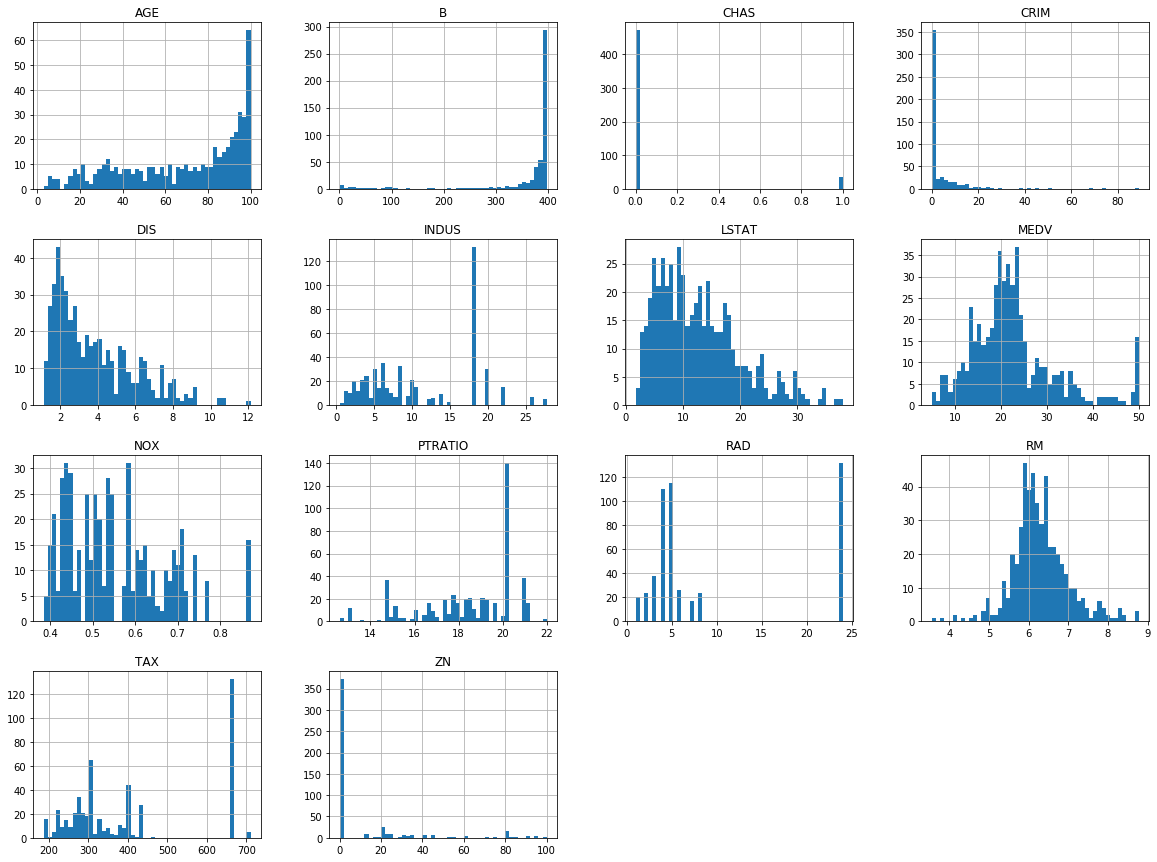

In [55]:
df.hist(bins=50 , figsize=(20,15))

# Train/Test Splitting

In [56]:
def train_test_split(data , test_ratio):
    np.random.seed(42)
    shuffle=np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle[:test_set_size]
    train_indices = shuffle[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [57]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(df , test_size=0.2 , random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:404
Rows in test set:102



In [58]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2 ,random_state =42)
for train_index , test_index in split.split(df , df['CHAS']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [59]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [60]:
strat_train_set.shape

(404, 14)

In [61]:
print(strat_test_set.describe())
x_train = strat_train_set.copy()

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean     3.655942   13.450980   10.312255    0.068627    0.541353    6.315078   
std     10.400966   27.503241    6.761154    0.254068    0.111397    0.678755   
min      0.009060    0.000000    0.460000    0.000000    0.385000    4.138000   
25%      0.057828    0.000000    4.950000    0.000000    0.448000    5.912750   
50%      0.176150    0.000000    7.760000    0.000000    0.515000    6.176000   
75%      2.061955    0.000000   18.100000    0.000000    0.612750    6.539500   
max     88.976200   90.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    66.733333    3.988460    8.813725  391.980392   18.385294  369.670196   
std     27.772183    2.1312

# Looking for Correlations

In [62]:
corr_matrix = x_train.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.682247
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AC337626C8>,
      dtype=object)

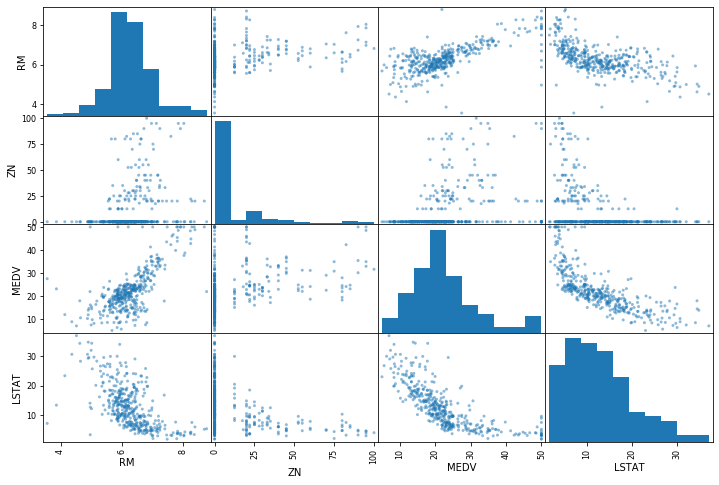

In [63]:
attributes =["RM","ZN","MEDV","LSTAT"]
scatter_matrix(x_train[attributes],figsize=(12,8))

<h3> From above scatter matrix we can see that there is strong positive correlation between MEDV and RM and there is strong negative correlation between MEDV and LSTAT</h3>

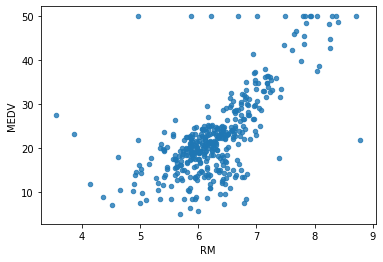

In [64]:
x_train.plot(kind="scatter", x="RM",y="MEDV",alpha=0.8)

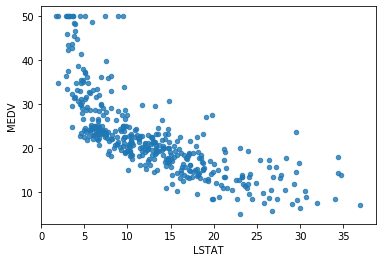

In [65]:
x_train.plot(kind="scatter", x="LSTAT",y="MEDV",alpha=0.8)

# Attribute Combination

In [66]:
x_train["TAXRM"]=x_train["TAX"]/x_train["RM"]

In [67]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [68]:
corr_matrix = x_train.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.682247
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524909
LSTAT     -0.740494
Name: MEDV, dtype: float64

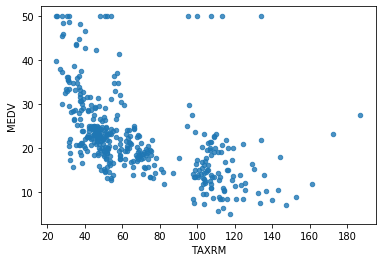

In [69]:
x_train.plot(kind="scatter", x="TAXRM",y="MEDV",alpha=0.8)

In [70]:
x_train.shape

(404, 15)

In [71]:
x_train = strat_train_set.drop("MEDV",axis=1)
Y_labels = strat_train_set["MEDV"].copy()

# Dropping the Missing Attributes

In [72]:
a=x_train.dropna(subset=["RM"]) # It is just a copy . Real data is not altered
a.shape

(404, 13)

In [73]:
# Get rid of the whole attribute
x_train.drop("RM",axis=1).shape

(404, 12)

In [74]:
median = x_train["RM"].median
print(median)

<bound method Series.median of 254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64>


In [75]:
x_train["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [76]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283052,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711901,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [77]:
x_train.shape

(404, 13)

In [78]:
imputer = SimpleImputer(strategy="median")
imputer.fit(x_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [79]:
X = imputer.transform(x_train)

In [80]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [81]:
imputer.statistics_.shape

(13,)

In [82]:
X_tr=pd.DataFrame(X, columns=x_train.columns)

In [83]:
X_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15


In [84]:
X_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283052,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711901,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Creating Pipeline

In [85]:
my_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [86]:
X_num_tr=my_pipeline.fit_transform(x_train)

In [87]:
X_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [88]:
X_num_tr.shape

(404, 13)

# Model

In [89]:
model = RandomForestRegressor()
model.fit(X_num_tr , Y_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Evaluation

In [90]:
X_predictions = model.predict(X_num_tr)
mse=mean_squared_error(Y_labels , X_predictions)
rmse = np.sqrt(mse)

In [91]:
rmse

1.1526673983366225

# Cross-Validation Set

In [92]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model , X_num_tr , Y_labels, scoring = "neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [93]:
rmse_scores

array([2.84153366, 2.66339017, 4.39233141, 2.49227619, 3.37066313,
       2.8970506 , 4.9751779 , 3.36091798, 2.83733196, 3.61135857])

In [94]:
def print_scores(scores):
    print("Scores:" ,scores)
    print("Mean:" ,scores.mean())
    print("Standard deviation: " ,scores.std())

In [95]:
print_scores(rmse_scores)

Scores: [2.84153366 2.66339017 4.39233141 2.49227619 3.37066313 2.8970506
 4.9751779  3.36091798 2.83733196 3.61135857]
Mean: 3.344203157794883
Standard deviation:  0.756956359741608


# Testing the Model

In [96]:
X_test= strat_test_set.drop("MEDV",axis=1)
Y_test= strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test , final_predictions)
final_rmse = np.sqrt(final_mse)

In [97]:
print(X_test_prepared)

[[-0.44228927 -0.4898311  -1.37640684 ... -1.21003475  0.38110555
  -0.57309194]
 [ 1.76329132 -0.4898311   0.98336806 ...  0.81196637  0.42050096
   1.24376169]
 [-0.36938851 -0.4898311  -0.74897749 ... -0.50468552  0.45343469
  -0.71838488]
 ...
 [-0.43875128  0.45939847 -0.83049963 ... -0.78682521  0.45343469
  -1.0394131 ]
 [-0.43651996 -0.4898311   2.08246124 ...  0.29471027  0.25301836
   0.20457123]
 [-0.43169386 -0.4898311   0.37049623 ... -0.97491834  0.45343469
   0.70963717]]


In [98]:
final_rmse

3.3897089353905687

In [99]:
print(final_predictions )

[24.216 11.559 25.397 22.017 18.649 14.939 19.944 14.173 31.323 41.551
 19.743 11.835 24.105 25.848 19.645 10.661 31.373 14.339 23.78  18.141
 20.264 17.467 19.98  22.4   18.602 30.662 15.854 32.931  9.271 33.426
 24.053 21.115 23.355 10.765 21.447 11.486 43.521 24.496 23.753 41.661
 24.125 31.147 20.527 20.931 19.054 33.506 45.275 20.26  20.243 22.093
 20.87  14.614 21.833 14.901 24.744 33.412 41.554 44.753 19.755 20.938
 47.236 10.604 18.525 24.971 14.929 32.671 19.806 18.243 19.503 33.622
 26.762 22.9   21.484 22.756 34.611 12.775 16.041 20.114 20.709 21.496
 22.627 21.107 13.767 22.986 20.833 21.054 14.33  21.551 21.72  23.389
 19.066 26.781  7.145 26.096 19.309 29.172 20.025 31.144 15.425 27.323
 21.448 20.04 ]


# Accuracy

In [100]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, final_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, final_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, final_predictions)))

Mean Absolute Error: 2.2489803921568625
Mean Squared Error: 11.490126666666661
Root Mean Squared Error: 3.3897089353905687


In [101]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(final_predictions ,Y_test) )

R2-score: 0.83


In [103]:
x = pd.read_csv("Data.csv")

In [106]:
X_test = x.drop("MEDV",axis=1)
Y_test = x["MEDV"].copy()

In [107]:
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)

In [108]:
print(final_predictions)

[26.048]


In [109]:
Y_test

0    24
Name: MEDV, dtype: int64